# Credit Scoring  Modelling Version 1 (11/15)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./processed.csv')
df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,26.822620,1,1,49.574949,21.465380,2,312.494089,2
1,576,2,1,7.509249,3.0,4.0,3.0,0,3.0,4.0,...,2,28.460148,31.944960,1,1,49.574949,21.465380,3,284.629162,2
2,576,3,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,28.609352,1,1,49.574949,21.465380,4,331.209863,2
3,576,4,1,7.509249,3.0,4.0,3.0,0,5.0,4.0,...,2,28.460148,31.377862,1,1,49.574949,21.465380,5,223.451310,2
4,576,5,1,7.509249,3.0,4.0,3.0,0,6.0,4.0,...,2,28.460148,24.797347,1,1,49.574949,21.465380,1,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9254,4,1,8.119522,4.0,6.0,7.0,0,23.0,7.0,...,2,22.413835,34.663572,1,1,35.104023,24.028477,0,479.866228,0
99996,9254,5,1,8.119522,4.0,6.0,7.0,0,18.0,7.0,...,2,22.413835,40.565631,1,1,35.104023,24.028477,1,496.651610,0
99997,9254,6,1,8.119522,4.0,6.0,7.0,0,27.0,6.0,...,2,22.413835,41.255522,1,1,35.104023,24.028477,0,516.809083,0
99998,9254,7,1,8.119522,4.0,6.0,7.0,0,20.0,6.0,...,2,22.413835,33.638208,1,1,35.104023,24.028477,3,319.164979,1


## DL

### LSTM

In [15]:
df_dl = df.copy()

In [18]:
for col in df_dl.iloc[:, :-1].columns[df_dl.iloc[:, :-1].dtypes != 'float']:
    df_dl[col] = df_dl[col].astype(np.float64)

In [19]:
df_dl.dtypes

Customer_ID                 float64
Month                       float64
Age                         float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour           float64
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [20]:
df_dl.select_dtypes('int')

,Credit_Score
0,2
1,2
2,2
3,2
4,2
...,...
99995,0
99996,0
99997,0
99998,1


In [21]:
train_df = df_dl[df_dl['Month'] <= 6]
test_df = df_dl[df_dl['Month'] > 6]

print(train_df.shape)
print(test_df.shape)

(75000, 22)
(25000, 22)


In [22]:
train_df

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089,2
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162,2
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863,2
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310,2
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466,1
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158,0
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228,0
99996,9254.0,5.0,1.0,8.119522,4.0,6.0,7.0,0.0,18.0,7.0,...,2.0,22.413835,40.565631,1.0,1.0,35.104023,24.028477,1.0,496.651610,0


In [23]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(75000, 21)
(75000,)
(25000, 21)
(25000,)


In [48]:
X_train

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,576.0,1.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,26.822620,1.0,1.0,49.574949,21.465380,2.0,312.494089
1,576.0,2.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,4.0,...,4.0,2.0,28.460148,31.944960,1.0,1.0,49.574949,21.465380,3.0,284.629162
2,576.0,3.0,1.0,7.509249,3.0,4.0,3.0,0.0,3.0,7.0,...,4.0,2.0,28.460148,28.609352,1.0,1.0,49.574949,21.465380,4.0,331.209863
3,576.0,4.0,1.0,7.509249,3.0,4.0,3.0,0.0,5.0,4.0,...,4.0,2.0,28.460148,31.377862,1.0,1.0,49.574949,21.465380,5.0,223.451310
4,576.0,5.0,1.0,7.509249,3.0,4.0,3.0,0.0,6.0,4.0,...,4.0,2.0,28.460148,24.797347,1.0,1.0,49.574949,21.465380,1.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,9254.0,2.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,6.0,...,3.0,2.0,22.413835,29.135447,1.0,1.0,35.104023,24.028477,4.0,400.104466
99994,9254.0,3.0,1.0,8.119522,4.0,6.0,7.0,0.0,20.0,6.0,...,3.0,2.0,22.413835,39.323569,1.0,1.0,35.104023,24.028477,1.0,410.256158
99995,9254.0,4.0,1.0,8.119522,4.0,6.0,7.0,0.0,23.0,7.0,...,3.0,2.0,22.413835,34.663572,1.0,1.0,35.104023,24.028477,0.0,479.866228
99996,9254.0,5.0,1.0,8.119522,4.0,6.0,7.0,0.0,18.0,7.0,...,3.0,2.0,22.413835,40.565631,1.0,1.0,35.104023,24.028477,1.0,496.651610


In [52]:
timesteps = 6
num_features = X_train.shape[-1]
sample_size = X_train.shape[0]

X_train_reshape = np.reshape(X_train.values, newshape=(12500, timesteps, num_features))
X_test_reshape = np.reshape(X_test.values, newshape=(12500, 2, num_features))

print(X_train_reshape.shape)
print(X_test_reshape.shape)

(12500, 6, 21)
(12500, 2, 21)


In [53]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [55]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [56]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [57]:
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten, SimpleRNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.initializers import GlorotUniform

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [59]:
import os

In [73]:
set_seed(42)
model = Sequential()
# model.add(LSTM(128, batch_input_shape=(12500, 6, 21)))
model.add(LSTM(128, input_shape=(6, 21), return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))
model.summary()

Random seed set as 42
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 6, 128)            76800     
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 216,835
Trainable 

In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('lstm_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [75]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-15 18:34:29.714792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 18:34:29.872563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 18:34:29.914315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/157 [..............................] - ETA: 3:21 - loss: 1.2020 - acc: 0.2344

2022-11-15 18:34:30.031668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 18:34:30.104571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - ETA: 0s - loss: 1.0182 - acc: 0.5204

2022-11-15 18:34:33.459164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 18:34:33.519665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-15 18:34:33.554434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.52240, saving model to lstm_best_model.h5
157/157 [==============================] - 5s 25ms/step - loss: 1.0182 - acc: 0.5204 - val_loss: 1.0117 - val_acc: 0.5224
Epoch 2/50
155/157 [============================>.] - ETA: 0s - loss: 1.0088 - acc: 0.5274
Epoch 2: val_acc did not improve from 0.52240
157/157 [==============================] - 3s 20ms/step - loss: 1.0095 - acc: 0.5267 - val_loss: 1.0128 - val_acc: 0.5220
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 1.0071 - acc: 0.5260
Epoch 3: val_acc did not improve from 0.52240
157/157 [==============================] - 3s 20ms/step - loss: 1.0071 - acc: 0.5260 - val_loss: 1.0109 - val_acc: 0.5224
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 1.0068 - acc: 0.5265
Epoch 4: val_acc did not improve from 0.52240
157/157 [==============================] - 3s 21ms/step - loss: 1.0068 - acc: 0.5265 - val_loss: 1.0101 - val_acc: 0.5220
Epoch 5/50
157/15

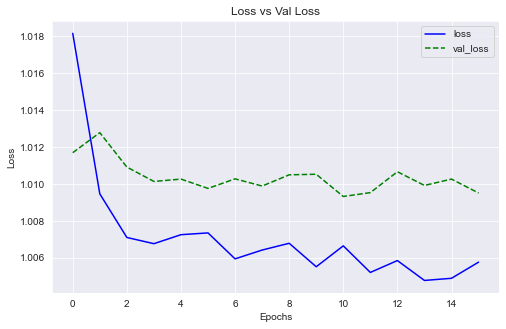

In [78]:
plot_loss(history)

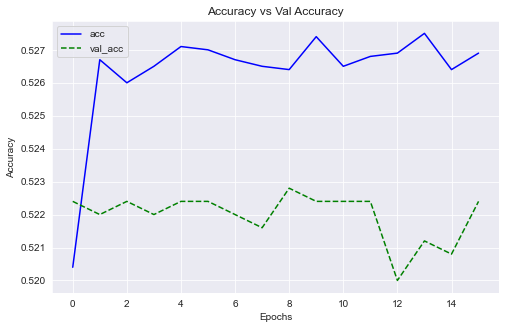

In [79]:
plot_acc(history)

## ML

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [121]:
from time import time
from datetime import timedelta

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    y_pred = model.predict(X_test)

    # for pred in result:
    #     y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

### NB

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
mnb = MultinomialNB()

In [84]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [85]:
mnb.score(X_test, y_test)

0.43056

### RF

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_params = {
    'n_estimators': np.arange(100, 1500, 300),
    'class_weight': [None, 'balanced', 'balanced_subsample'],
}

In [103]:
clf = RandomizedSearchCV(rfc, rf_params, random_state=42)
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'n_estimators': array([ 100,  400,  700, 1000, 1300])},
                   random_state=42)

In [104]:
clf.best_estimator_

RandomForestClassifier(n_estimators=700, n_jobs=-1, random_state=42)

In [107]:
rf = clf.best_estimator_

In [108]:
clf.score(X_test, y_test)

0.74092

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


              precision    recall  f1-score   support

           0     0.7338    0.7851    0.7586      7216
           1     0.7572    0.7407    0.7489     12960
           2     0.7080    0.6754    0.6913      4824

    accuracy                         0.7409     25000
   macro avg     0.7330    0.7337    0.7329     25000
weighted avg     0.7410    0.7409    0.7406     25000



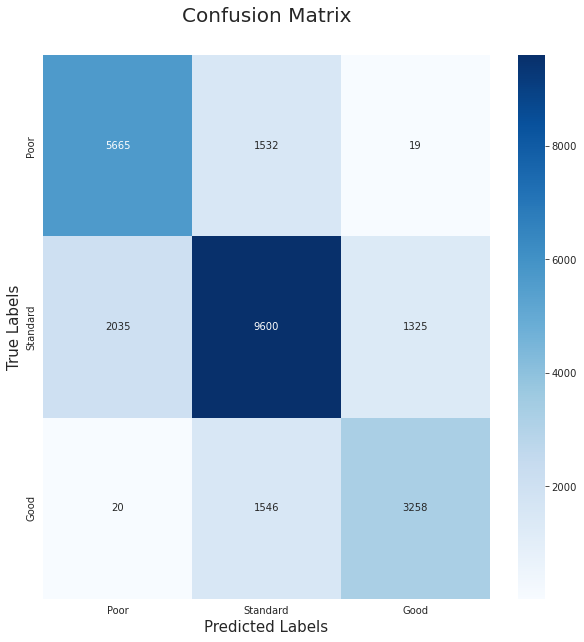

In [111]:
clf_report_plot(y_test, X_test, clf)

### XGBoost

In [123]:
from xgboost import XGBClassifier
from dask.diagnostics import ProgressBar

In [140]:
xgb = XGBClassifier(verbose=1, n_jobs=-1, random_state=42)

xgb_params = {
    'n_estimators': np.arange(100, 1600, 500),
    'max_depth': [0, 3, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': np.arange(5, 11)/10
}

In [141]:
clf = RandomizedSearchCV(xgb, xgb_params, random_state=42)

start_time = time()
with ProgressBar():
    clf.fit(X_train, y_train)

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

[15:50:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1665563071359/work/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:51:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1665563071359/work/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:52:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1665563071359/work/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.


In [142]:
xgb = clf.best_estimator_

In [145]:
clf.score(X_train, y_train)

0.7386

In [146]:
clf.score(X_test, y_test)

0.6412

0.6412

              precision    recall  f1-score   support

           0     0.6663    0.5940    0.6280      7216
           1     0.6807    0.6773    0.6790     12960
           2     0.5230    0.6148    0.5652      4824

    accuracy                         0.6412     25000
   macro avg     0.6233    0.6287    0.6241     25000
weighted avg     0.6461    0.6412    0.6423     25000



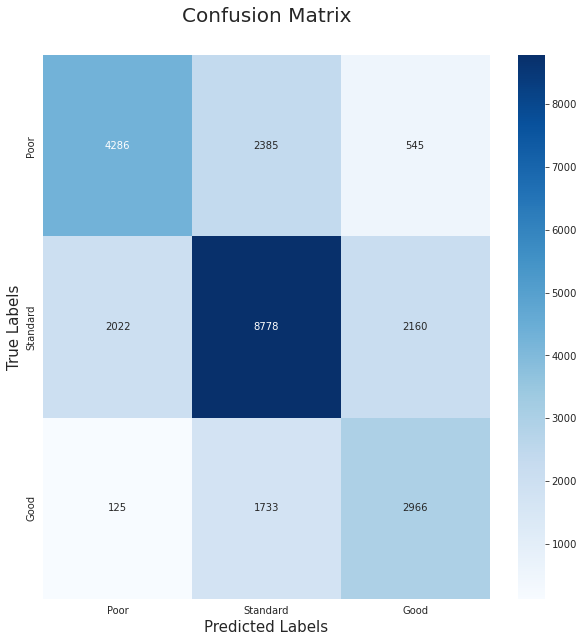

              precision    recall  f1-score   support

           0     0.6663    0.5940    0.6280      7216
           1     0.6807    0.6773    0.6790     12960
           2     0.5230    0.6148    0.5652      4824

    accuracy                         0.6412     25000
   macro avg     0.6233    0.6287    0.6241     25000
weighted avg     0.6461    0.6412    0.6423     25000



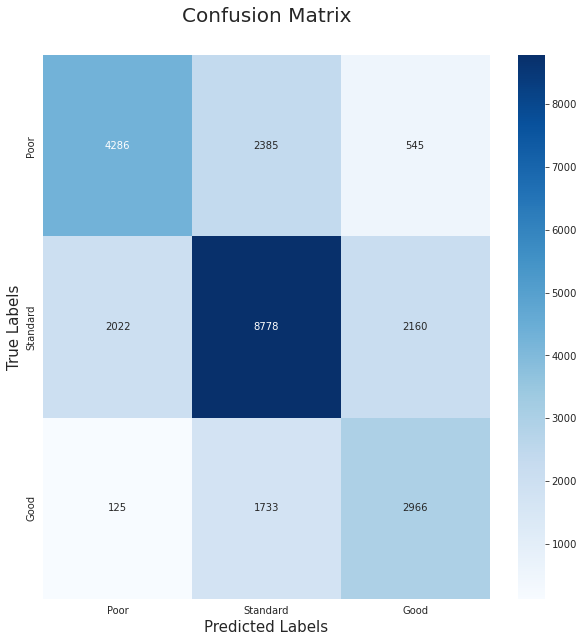

In [147]:
clf_report_plot(y_test, X_test, clf)

### LGBM

In [126]:
from lightgbm import LGBMClassifier

In [127]:
lgb = LGBMClassifier(n_jobs=-1, random_state=42)
lgb_params = {
    'learning_rate': np.arange(5, 10) / 100,
    'n_estimators': np.arange(100, 1100),
    'num_leaves': [10, 20, 30, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'boosting': ['gbdt','rf']
}

In [128]:
clf = RandomizedSearchCV(lgb, lgb_params, n_iter=15, random_state=42)

start_time = time()
with ProgressBar():
    clf.fit(X_train, y_train)

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf


[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f at /Users/runner/miniforge3/conda-bld/lightgbm_1665453933763/work/compile/src/boosting/rf.hpp, line 35 .

[LightGBM] [Fatal] Check failed: config->bagging_freq > 0 && con

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-pa

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Learning Durations:  0:08:06.104360


In [129]:
lgb = clf.best_estimator_

In [130]:
clf.score(X_test, y_test)

0.6996

              precision    recall  f1-score   support

           0     0.7061    0.6973    0.7017      7216
           1     0.7254    0.7111    0.7182     12960
           2     0.6272    0.6721    0.6489      4824

    accuracy                         0.6996     25000
   macro avg     0.6862    0.6935    0.6896     25000
weighted avg     0.7009    0.6996    0.7000     25000



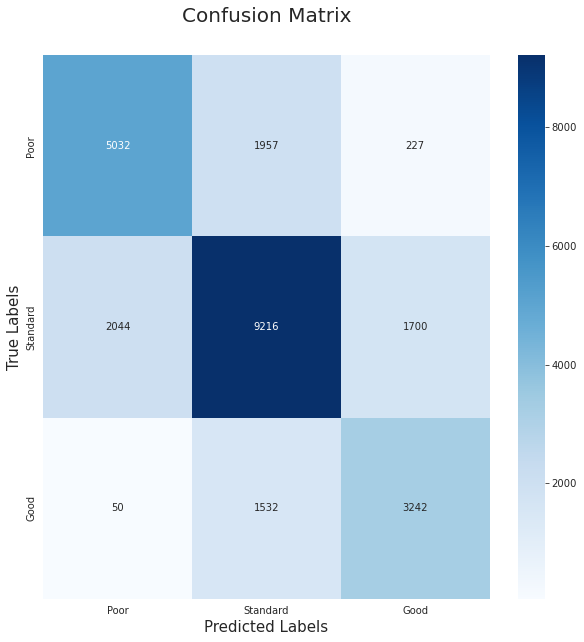

In [131]:
clf_report_plot(y_test, X_test, clf)

### Catboost

In [132]:
from catboost import CatBoostClassifier

In [133]:
cbc = CatBoostClassifier(random_state=42)

cb_params = {
    'iterations': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 15, 3),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
}

In [134]:
clf = RandomizedSearchCV(cbc, cb_params, n_iter=10, random_state=42)

start_time = time()
with ProgressBar():
    clf.fit(X_train, y_train)

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

0:	learn: 0.7818339	total: 132ms	remaining: 13.1s
1:	learn: 0.6878119	total: 192ms	remaining: 9.41s
2:	learn: 0.6383222	total: 262ms	remaining: 8.48s
3:	learn: 0.6017096	total: 374ms	remaining: 8.97s
4:	learn: 0.5784540	total: 442ms	remaining: 8.4s
5:	learn: 0.5619557	total: 505ms	remaining: 7.91s
6:	learn: 0.5509705	total: 565ms	remaining: 7.51s
7:	learn: 0.5407190	total: 620ms	remaining: 7.13s
8:	learn: 0.5329864	total: 672ms	remaining: 6.8s
9:	learn: 0.5269438	total: 722ms	remaining: 6.5s
10:	learn: 0.5102792	total: 781ms	remaining: 6.32s
11:	learn: 0.5010993	total: 842ms	remaining: 6.17s
12:	learn: 0.4932672	total: 897ms	remaining: 6s
13:	learn: 0.4845419	total: 952ms	remaining: 5.85s
14:	learn: 0.4782335	total: 1s	remaining: 5.7s
15:	learn: 0.4729653	total: 1.06s	remaining: 5.59s
16:	learn: 0.4643291	total: 1.13s	remaining: 5.5s
17:	learn: 0.4490876	total: 1.22s	remaining: 5.56s
18:	learn: 0.4411337	total: 1.29s	remaining: 5.51s
19:	learn: 0.4345545	total: 1.35s	remaining: 5.41s
2

In [135]:
cbc = clf.best_estimator_

In [136]:
clf.score(X_train, y_train)

0.7397333333333334

In [137]:
clf.score(X_test, y_test)

0.64116

              precision    recall  f1-score   support

           0     0.6719    0.5894    0.6279      7216
           1     0.6763    0.6867    0.6814     12960
           2     0.5220    0.5964    0.5567      4824

    accuracy                         0.6412     25000
   macro avg     0.6234    0.6241    0.6220     25000
weighted avg     0.6453    0.6412    0.6419     25000



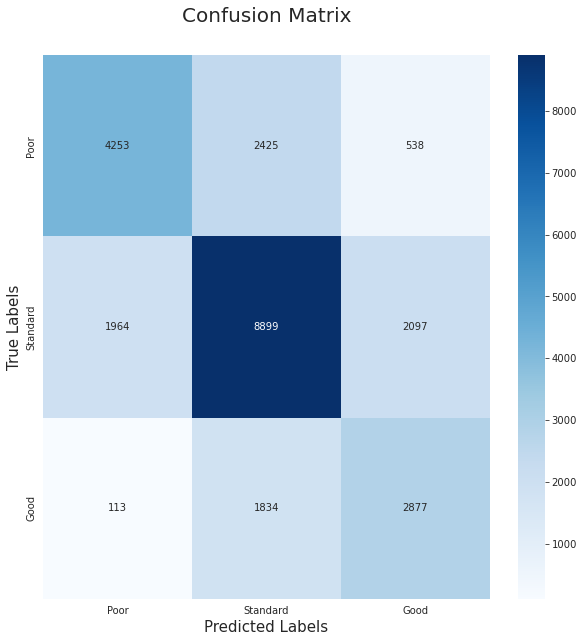

In [138]:
clf_report_plot(y_test, X_test, clf)

### Stacking

In [148]:
from sklearn.ensemble import StackingClassifier

In [149]:
model = StackingClassifier([
    ('randomforest', rf),
    ('xgb', xgb),
    ('lgb', lgb),
    ('cbc', cbc)
], n_jobs=-1)

In [150]:
model.fit(X_train, y_train)

[17:22:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1665563071359/work/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:22:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1665563071359/work/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:22:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1665563071359/work/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
0:	learn: 1.0900361	total: 206ms	remaining: 1m 1s
1:	learn: 1.0818296	total: 320ms	remaining: 47.6s
2:	learn: 1.0742476	total: 400ms	remaining: 39.6s
3:	learn: 1.0664058	total: 490ms	remaining: 36.2s
4:	learn: 1.0590828	total: 562ms	remaining: 33.2s
5:	learn: 1.0516756	total: 712ms	remaining: 34.9s
6:	learn: 1.0443085	total: 851ms	remaining: 35.6s
7:	learn: 1.0371722	total: 979ms	remaining: 35.7s
8:	learn: 1.0302235	total: 1.09s	remaining: 35.3s
9:	learn: 

/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('randomforest',
                                RandomForestClassifier(n_estimators=700,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise...
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=1100, n_jobs=-1,
                                              num_parallel_tree=1,
                                              objective='multi:softprob',
                                              predictor='auto', random_state=42,
                                              reg_alpha=0, ...)),
                               ('lgb',
                                LGBMClassifier(boosting='gbdt',
                                               learning_rate=0.05, max_depth=15,
                                               n_estimators=304, num_leaves=40,
                                               random_state=42)),
                               ('cbc',
                                <catboost.core.CatBoostClassifier object at 0x44884b8b0>)],
                   n_jobs=-1)

In [151]:
print("Train Score: ", model.score(X_train, y_train))

Train Score:  0.8866933333333333


In [152]:
print("Test Score: ", model.score(X_test, y_test))

Test Score:  0.7022


              precision    recall  f1-score   support

           0     0.7141    0.6750    0.6940      7216
           1     0.7091    0.7495    0.7287     12960
           2     0.6631    0.6157    0.6385      4824

    accuracy                         0.7022     25000
   macro avg     0.6954    0.6801    0.6871     25000
weighted avg     0.7016    0.7022    0.7013     25000



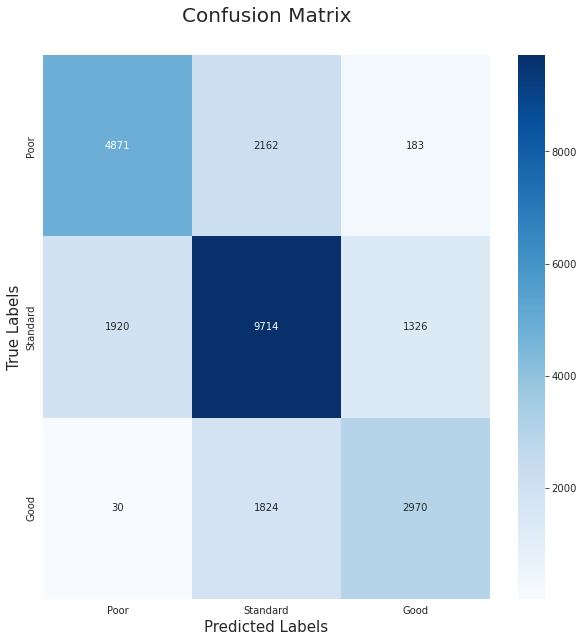

In [153]:
clf_report_plot(y_test, X_test, model)